Epoch1/20,Loss:0.9768763269782066
Epoch2/20,Loss:0.9498056225776672
Epoch3/20,Loss:0.9360807610154152
Epoch4/20,Loss:0.9275293816328049
Epoch5/20,Loss:0.9215973397493362
Epoch6/20,Loss:0.9171932610273361
Epoch7/20,Loss:0.9137804908752442
Epoch8/20,Loss:0.9110536429286004
Epoch9/20,Loss:0.9088260288834572
Epoch10/20,Loss:0.906974034011364
Epoch11/20,Loss:0.905414613366127
Epoch12/20,Loss:0.9040876784324646
Epoch13/20,Loss:0.902949408710003
Epoch14/20,Loss:0.9019663573503495
Epoch15/20,Loss:0.901112798511982
Epoch16/20,Loss:0.9003679938912391
Epoch17/20,Loss:0.8997155367136002
Epoch18/20,Loss:0.8991424788832665
Epoch19/20,Loss:0.8986370642185211
Epoch20/20,Loss:0.898190611243248


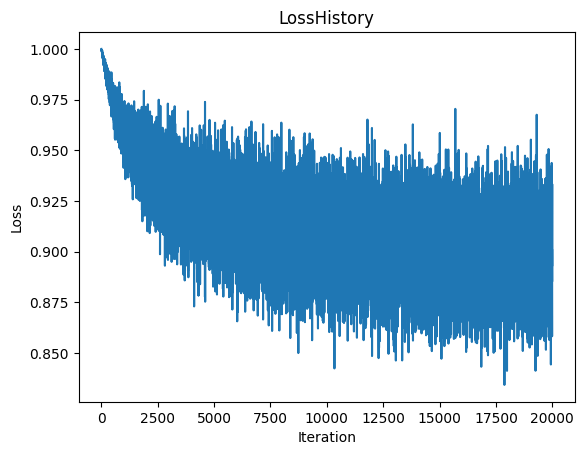

Trainingaccuracy:32.21%
Testaccuracy:32.39%


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
#1.Dataloading
transform=transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size=50
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data',train=False ,download=False , transform=transform )
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False,num_workers=2)
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
#2.Define Network Parameters
Din=3*32*32 # Inputsize(flattenedCIFAR=10imagesize)
K=10 #Outputsize (numberofclassesinCIFAR=10)
std=1e-5
#Initialize weights and biases
w=torch.randn(Din,K)*std #Onelayer:directlymapinputtooutput
b=torch.zeros(K)
#Hyperparameters
iterations=20
lr= 2e-6 #Learningrate
lr_decay=0.9#Learningratedecay
reg=0#Regularization
loss_history=[]
#3.TrainingLoop
for t in range(iterations):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        #Getinputsandlabels
        inputs,labels=data
        Ntr=inputs.shape[0]#Batchsize
        x_train=inputs.view(Ntr,-1)#Flatteninputto(Ntr,Din)
        y_train_onehot=nn.functional.one_hot(labels,K).float()#Convertlabelstoone=h
        #Forwardpass
        y_pred=x_train.mm(w)+b#Outputlayeractivation
        #Loss calculation(MeanSquaredErrorwithregularization)
        loss=(1/Ntr)*torch.sum((y_pred-y_train_onehot)**2)+reg*torch.sum(w**2)
        loss_history.append(loss.item())
        running_loss+=loss.item()
        #Backpropagation
        dy_pred=(2.0/Ntr)*(y_pred-y_train_onehot)
        dw=x_train.t().mm(dy_pred)+reg*w
        db=dy_pred.sum(dim=0)
        #Parameterupdate
        w-=lr*dw
        b-=lr*db
        #Printlossforeveryepoch
    if t%1==0:
        print(f"Epoch{t+1}/{iterations},Loss:{running_loss/len(trainloader)}")
    #Learningratedecay
    lr*=lr_decay
#4.PlottingtheLossHistory
plt.plot(loss_history)
plt.title("LossHistory")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
#5.CalculateAccuracyonTrainingSet
correct_train=0
total_train=0
with torch.no_grad():
    for data in trainloader:
        inputs,labels=data
        Ntr=inputs.shape[0]
        x_train=inputs.view(Ntr,-1)
        y_train_onehot=nn.functional.one_hot(labels,K).float()
        #Forwardpass
        y_train_pred=x_train.mm(w)+b
        predicted_train=torch.argmax(y_train_pred,dim=1)
        total_train+=labels.size(0)
        correct_train+=(predicted_train==labels).sum().item()
train_acc=100*correct_train/total_train
print(f"Trainingaccuracy:{train_acc:.2f}%")
#6.CalculateAccuracyonTestSet
correct_test=0
total_test=0
with torch.no_grad():
    for data in testloader:
        inputs,labels=data
        Nte=inputs.shape[0]
        x_test=inputs.view(Nte,-1)
        y_test_onehot=nn.functional.one_hot(labels,K).float()
        #Forwardpass
        y_test_pred=x_test.mm(w)+b
        predicted_test=torch.argmax(y_test_pred,dim=1)
        total_test+=labels.size(0)
        correct_test+=(predicted_test==labels).sum().item()
test_acc=100*correct_test/total_test
print(f"Testaccuracy:{test_acc:.2f}%")

Epoch : 1/20,Loss : 0.9902700492739678
Epoch : 2/20,Loss : 0.9740576912760734
Epoch : 3/20,Loss : 0.9619735755324363
Epoch : 4/20,Loss : 0.9527945904135704
Epoch : 5/20,Loss : 0.9457027670741082
Epoch : 6/20,Loss : 0.9401389698386192
Epoch : 7/20,Loss : 0.9357135435342788
Epoch : 8/20,Loss : 0.9321497375369072
Epoch : 9/20,Loss : 0.9292476071715355
Epoch : 10/20,Loss : 0.9268605529665946
Epoch : 11/20,Loss : 0.9248793295025826
Epoch : 12/20,Loss : 0.9232215955853462
Epoch : 13/20,Loss : 0.9218243365883827
Epoch : 14/20,Loss : 0.9206389071941375
Epoch : 15/20,Loss : 0.9196272031664848
Epoch : 16/20,Loss : 0.9187591635584831
Epoch : 17/20,Loss : 0.9180108495354652
Epoch : 18/20,Loss : 0.9173629321455955
Epoch : 19/20,Loss : 0.9167998096346855
Epoch : 20/20,Loss : 0.9163086076378822


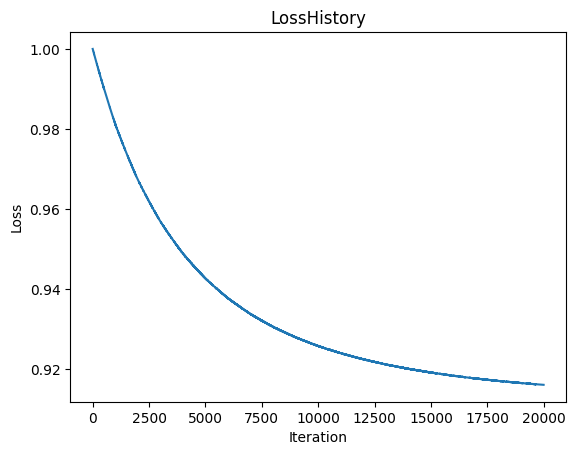

Trainingaccuracy:1.74%
Testaccuracy:1.75%


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
#1.Dataloading
transform=transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
batch_size=50
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data',train=False ,download=False , transform=transform )
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False,num_workers=2)
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
#2.Define Network Parameters
Din=3*32*32 # Inputsize(flattenedCIFAR=10imagesize)
K=10 #Outputsize (numberofclassesinCIFAR=10)
H = 100             # Size of the hidden layer
std=1e-5
# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Weights for input to hidden layer
b1 = torch.zeros(H)             # Biases for hidden layer
w2 = torch.randn(H, K) * std    # Weights for hidden to output layer
b2 = torch.zeros(K)             # Biases for output layer
#Hyperparameters
iterations=20
lr= 2e-6 #Learningrate
lr_decay=0.9#Learningratedecay
reg=0#Regularization
loss_history=[]
#3.TrainingLoop
for t in range(iterations):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        #Getinputsandlabels
        inputs,labels=data
        Ntr=inputs.shape[0]#Batchsize
        x_train=inputs.view(Ntr,-1)#Flatteninputto(Ntr,Din)
        y_train_onehot=nn.functional.one_hot(labels,K).float()#Convertlabelstoone=h
        #Forwardpass
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)  # Apply sigmoid activation on hidden layer
        y_pred = hidden_layer.mm(w2) + b2  # Output layer activation
        #Loss calculation(MeanSquaredErrorwithregularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss+=loss.item()
        #Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw2 = hidden_layer.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        dhidden_layer = dy_pred.mm(w2.t()) * hidden_layer * (1 - hidden_layer)  # Gradient of sigmoid
        dw1 = x_train.t().mm(dhidden_layer) + reg * w1
        db1 = dhidden_layer.sum(dim=0)

        # Parameter update
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1
        #Printlossforeveryepoch
    if t%1==0:
        print(f"Epoch : {t+1}/{iterations},Loss : {running_loss/len(trainloader)}")
    #Learningratedecay
    lr*=lr_decay
#4.PlottingtheLossHistory
plt.plot(loss_history)
plt.title("LossHistory")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
#5.CalculateAccuracyonTrainingSet
correct_train=0
total_train=0
with torch.no_grad():
    for data in trainloader:
        inputs,labels=data
        Ntr=inputs.shape[0]
        x_train=inputs.view(Ntr,-1)
        y_train_onehot=nn.functional.one_hot(labels,K).float()
        #Forwardpass
        y_train_pred = x_train.mm(w1) + b1
        predicted_train=torch.argmax(y_train_pred,dim=1)
        total_train+=labels.size(0)
        correct_train+=(predicted_train==labels).sum().item()
train_acc=100*correct_train/total_train
print(f"Trainingaccuracy:{train_acc:.2f}%")
#6.CalculateAccuracyonTestSet
correct_test=0
total_test=0
with torch.no_grad():
    for data in testloader:
        inputs,labels=data
        Nte=inputs.shape[0]
        x_test=inputs.view(Nte,-1)
        y_test_onehot=nn.functional.one_hot(labels,K).float()
        #Forwardpass
        y_test_pred = x_test.mm(w1) + b1
        predicted_test=torch.argmax(y_test_pred,dim=1)
        total_test+=labels.size(0)
        correct_test+=(predicted_test==labels).sum().item()
test_acc=100*correct_test/total_test
print(f"Testaccuracy:{test_acc:.2f}%")

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.050584155201912
Epoch 2/10, Loss: 1.7940382491350173
Epoch 3/10, Loss: 1.7081458842754365
Epoch 4/10, Loss: 1.657094073176384
Epoch 5/10, Loss: 1.618026115655899
Epoch 6/10, Loss: 1.5863447465896607
Epoch 7/10, Loss: 1.556751939892769
Epoch 8/10, Loss: 1.5314404603242875
Epoch 9/10, Loss: 1.5081730649471283
Epoch 10/10, Loss: 1.4865343767404555


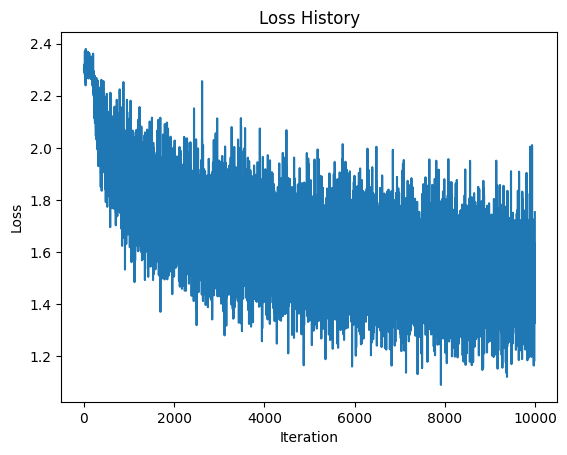

Training accuracy: 49.67%
Test accuracy: 46.28%


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Data Loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100            # Size of the hidden layer
K = 10             # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases for both layers
w1 = torch.randn(Din, H) * std  # Weights for input to hidden layer
b1 = torch.zeros(H)             # Biases for hidden layer
w2 = torch.randn(H, K) * std    # Weights for hidden to output layer
b2 = torch.zeros(K)             # Biases for output layer

# Hyperparameters
iterations = 10
lr = 2e-3   # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0     # Regularization
loss_history = []

# Define Cross-Entropy Loss
criterion = nn.CrossEntropyLoss()

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)  # Apply sigmoid activation on hidden layer
        y_pred = hidden_layer.mm(w2) + b2  # Output layer activation (logits)

        # Cross-entropy loss (adds regularization)
        loss = criterion(y_pred, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Calculate gradients manually for backpropagation
        dy_pred = torch.zeros_like(y_pred)
        dy_pred[range(Ntr), labels] -= 1 / y_pred[range(Ntr), labels].exp().sum()
        dy_pred += y_pred.softmax(dim=1)

        dw2 = hidden_layer.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)
        dhidden_layer = dy_pred.mm(w2.t()) * hidden_layer * (1 - hidden_layer)  # Sigmoid gradient
        dw1 = x_train.t().mm(dhidden_layer) + reg * w1
        db1 = dhidden_layer.sum(dim=0)

        # Parameter update
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plot Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden_layer = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden_layer.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden_layer = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden_layer.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")
